In [264]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [265]:
RUL = pd.read_csv("/kaggle/input/the-cmapss-dataset/RUL_FD001.csv", index_col=0)
print(f"Length of RUL: {len(RUL)}")
train_df = pd.read_csv("/kaggle/input/the-cmapss-dataset/train_FD001.csv", index_col=0)
print(f"Length of train_df: {len(train_df)}")
test_df  = pd.read_csv("/kaggle/input/the-cmapss-dataset/test_FD001.csv", index_col=0)
print(f"Length of test_df: {len(test_df)}")

Length of RUL: 100
Length of train_df: 20631
Length of test_df: 13096


In [4]:
RUL.head()

,RUL,unit number
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [5]:
train_df.head()

,unit number,time in cycles,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
test_df.head()

,unit number,time in cycles,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


### Change column names for simplicity

In [266]:
column_names = []
for i in range(25):
    if i == 0: column_names.append("unit")
    if i == 1: column_names.append("time")
    if i > 1 and i < 5: column_names.append("c" + str(i-1))
    if i >= 4: column_names.append("s" + str(i-3))
print(column_names)
len(column_names)

['unit', 'time', 'c1', 'c2', 'c3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


26

In [267]:
train_df.columns = column_names
test_df.columns = column_names
RUL.columns = ['rul', 'unit']

In [9]:
train_df.head()

,unit,time,c1,c2,c3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
test_df.head()

,unit,time,c1,c2,c3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [11]:
RUL.head()

,rul,unit
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


## Preprocessing

### Data normalization

In [269]:
# Normalize the data
scaler = MinMaxScaler()
train_df.iloc[:, 2:] = scaler.fit_transform(train_df.iloc[:, 2:])
# test_df.iloc[:, 2:] = scaler.fit_transform(test_df.iloc[:, 2:])
test_df.iloc[:, 2:] = scaler.transform(test_df.iloc[:, 2:])

In [13]:
train_df.head()

,unit,time,c1,c2,c3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0,0.0,0.713178,0.724662
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0,0.0,0.666667,0.731014
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0,0.0,0.627907,0.621375
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0,0.0,0.573643,0.662386
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0,0.0,0.589147,0.704502


In [14]:
test_df.head()

,unit,time,c1,c2,c3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,...,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0,0.0,0.558140,0.661834
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,...,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0,0.0,0.682171,0.686827
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,...,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0,0.0,0.728682,0.721348
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,...,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0,0.0,0.666667,0.662110
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,...,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0,0.0,0.658915,0.716377


In [7]:
SEED = 313
np.random.seed(SEED)
random.seed(SEED)

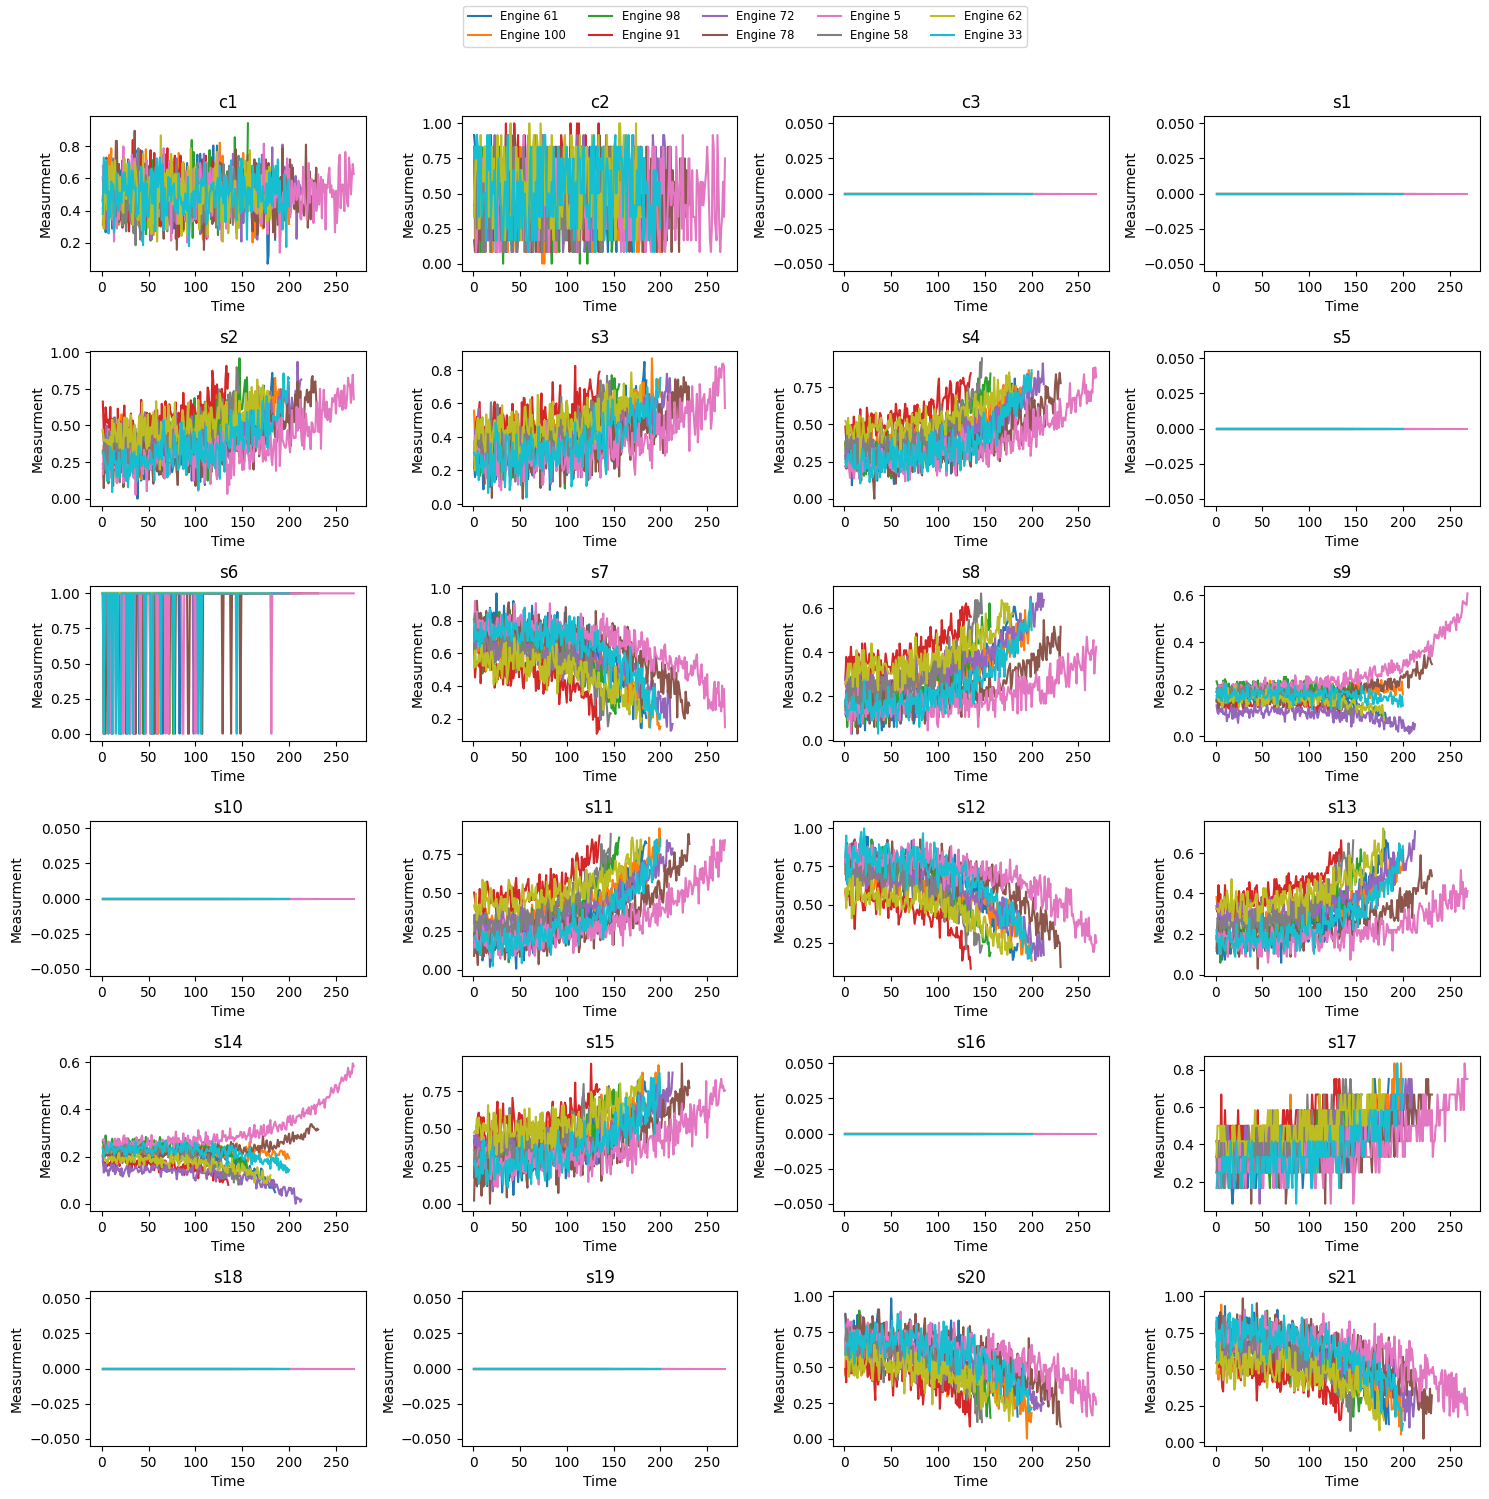

In [16]:
engines = train_df['unit'].unique()
selected_engines = np.random.choice(engines, 10, replace=False)

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))
axes = axes.flatten()
sensor_cols = [col for col in train_df.columns if col.startswith('s') or col.startswith('c')]

lines = []
labels = []

for engine in selected_engines:
    line, = plt.plot([], [], label=f'Engine {engine}')
    lines.append(line)
    labels.append(f'Engine {engine}')

for i, sensor in enumerate(sensor_cols):
    ax = axes[i]
    for engine in selected_engines:
        engine_data = train_df[train_df['unit'] == engine]
        ax.plot(engine_data['time'], engine_data[sensor])
    ax.set_title(sensor)
    ax.set_xlabel('Time')
    ax.set_ylabel('Measurment')

fig.legend(lines, labels, loc='upper center', ncol=5, fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Data selection

In [8]:
non_informative_cols = ['c3', 's1', 's5', 's10', 's16', 's19']
train_df = train_df.drop(non_informative_cols, axis=1)
test_df  = test_df.drop(non_informative_cols, axis=1)

In the following section we are computing RUL for test set and add it as a column to its corresponding df.

In [9]:
max_values_df1 = test_df.groupby('unit')['time'].transform("max")
new_df = pd.DataFrame({'max_value': max_values_df1, 'unit': test_df['unit']})
new_df.drop_duplicates(inplace=True)
new_df.reset_index(drop=True, inplace=True)

In [22]:
new_df

,max_value,unit
0,31,1
1,49,2
2,126,3
3,106,4
4,98,5
...,...,...
95,97,96
96,134,97
97,121,98
98,97,99


In [13]:
new_df['sum'] = new_df['max_value'] + RUL['rul']

In [14]:
new_df

,max_value,unit,sum
0,31,1,143
1,49,2,147
2,126,3,195
3,106,4,188
4,98,5,189
...,...,...,...
95,97,96,234
96,134,97,216
97,121,98,180
98,97,99,214


In [15]:
test_df = pd.merge(new_df, test_df, on='unit')
test_df['rul'] = test_df['sum'] - test_df['time']

In [26]:
test_df

,max_value,unit,sum,time,c1,c2,s2,s3,s4,s6,...,s11,s12,s13,s14,s15,s17,s18,s20,s21,rul
0,31,1,143,1,0.632184,0.750000,0.545181,0.310661,0.269413,1.0,...,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0,0.558140,0.661834,142
1,31,1,143,2,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,...,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0,0.682171,0.686827,141
2,31,1,143,3,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,...,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0,0.728682,0.721348,140
3,31,1,143,4,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,...,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0,0.666667,0.662110,139
4,31,1,143,5,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,...,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0,0.658915,0.716377,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,198,100,218,194,0.781609,0.500000,0.611446,0.619359,0.566172,1.0,...,0.500000,0.426439,0.176471,0.584890,0.564063,0.500000,0,0.395349,0.418669,24
13092,198,100,218,195,0.436782,0.416667,0.605422,0.537388,0.671843,1.0,...,0.446429,0.503198,0.308824,0.572350,0.485956,0.583333,0,0.333333,0.528721,23
13093,198,100,218,196,0.465517,0.250000,0.671687,0.482014,0.414754,1.0,...,0.428571,0.530917,0.235294,0.605326,0.507888,0.583333,0,0.372093,0.429301,22
13094,198,100,218,197,0.281609,0.583333,0.617470,0.522128,0.626435,1.0,...,0.452381,0.562900,0.294118,0.622046,0.562524,0.583333,0,0.403101,0.518779,21


Calculate RUL for train set

In [16]:
def calculate_rul(df):
    max_cycles = df.groupby('unit')['time'].max().reset_index()
    max_cycles.columns = ['unit', 'max_time']
    df = df.merge(max_cycles, on='unit')
    df['rul'] = df['max_time'] - df['time']
    df = df.drop(columns=['max_time'])
    return df

train_df = calculate_rul(train_df)

In [28]:
train_df.head()

,unit,time,c1,c2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s18,s20,s21,rul
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,...,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,...,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,...,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,...,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,...,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0,0.589147,0.704502,187


Label data using the threshold 

In [17]:
time_window = 50

train_df['label'] = train_df['rul'].apply(lambda x: 0 if x <= time_window else 1)
test_df['label']  = test_df['rul'].apply(lambda x: 0 if x <= time_window else 1)

In [30]:
train_df.head()

,unit,time,c1,c2,s2,s3,s4,s6,s7,s8,...,s12,s13,s14,s15,s17,s18,s20,s21,rul,label
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,...,0.633262,0.205882,0.199608,0.363986,0.333333,0,0.713178,0.724662,191,1
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,...,0.765458,0.279412,0.162813,0.411312,0.333333,0,0.666667,0.731014,190,1
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,...,0.795309,0.220588,0.171793,0.357445,0.166667,0,0.627907,0.621375,189,1
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,...,0.889126,0.294118,0.174889,0.166603,0.333333,0,0.573643,0.662386,188,1
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,...,0.746269,0.235294,0.174734,0.402078,0.416667,0,0.589147,0.704502,187,1


In [31]:
test_df.head()

,max_value,unit,sum,time,c1,c2,s2,s3,s4,s6,...,s12,s13,s14,s15,s17,s18,s20,s21,rul,label
0,31,1,143,1,0.632184,0.750000,0.545181,0.310661,0.269413,1.0,...,0.646055,0.220588,0.132160,0.308965,0.333333,0,0.558140,0.661834,142,1
1,31,1,143,2,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,...,0.739872,0.264706,0.204768,0.213159,0.416667,0,0.682171,0.686827,141,1
2,31,1,143,3,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,...,0.699360,0.220588,0.155640,0.458638,0.416667,0,0.728682,0.721348,140,1
3,31,1,143,4,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,...,0.573561,0.250000,0.170090,0.257022,0.250000,0,0.666667,0.662110,139,1
4,31,1,143,5,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,...,0.737740,0.220588,0.152751,0.300885,0.166667,0,0.658915,0.716377,138,1


In [18]:
sensor_columns = [col for col in train_df.columns if col.startswith('s')]

def create_time_windows_train(df, window_size, stride=1):
    engine_ids = df['unit'].unique()
    X, y_reg, y_clf = [], [], []
    for engine_id in engine_ids:
        engine_df = df[df['unit'] == engine_id]
        for start in range(0, len(engine_df) - window_size + 1, stride):
            end = start + window_size
            window = engine_df.iloc[start:end]
            X.append(window[sensor_columns].values)
            y_reg.append(window['rul'].values[-1])
            y_clf.append(window['label'].values[-1])
    return np.array(X), np.array(y_reg), np.array(y_clf)

def create_time_windows_test(df, window_size, stride=1):
    engine_ids = df['unit'].unique()
    X_reg, X_clf, y_reg, y_clf = [], [], [], []

    for engine_id in engine_ids:
        engine_df = df[df['unit'] == engine_id]
        for start in range(0, len(engine_df) - window_size + 1, stride):
            end = start + window_size
            window = engine_df.iloc[start:end]
            if start == len(engine_df) - window_size:
                X_reg.append(window[sensor_columns].values)
                y_reg.append(window['rul'].values[-1])
            X_clf.append(window[sensor_columns].values)
            y_clf.append(window['label'].values[-1])


    return np.array(X_reg), np.array(X_clf), np.array(y_reg), np.array(y_clf)
    

window_size = 30
X_train, y_reg_train, y_clf_train = create_time_windows_train(train_df, window_size)


X_reg_test, X_clf_test, y_reg_test, y_clf_test = create_time_windows_test(test_df, window_size)


In [92]:
X_reg_test_all, y_reg_test_all, y_clf_test_all = create_time_windows_train(test_df, window_size)

In [33]:
print(f"Number of samples for training in classification/regression task: {len(X_train)}")
print(f"Number of samples for testing in classification task:             {len(X_clf_test)}")
print(f"Number of samples for testing in regression task:                 {len(X_reg_test)}")

Number of samples for training in classification/regression task: 17731
Number of samples for testing in classification task:             10196
Number of samples for testing in regression task:                 100


In [34]:
print(f"X_train shape:     {X_train.shape} \
      \ny_reg_train shape: {y_reg_train.shape} \
      \ny_clf_train shape: {y_clf_train.shape} \
      \nX_reg_test shape:  {X_reg_test.shape}  \
      \ny_reg_test shape:  {y_reg_test.shape} \
      \nX_clf_test shape:  {X_clf_test.shape} \
      \ny_clf_test shape:  {y_clf_test.shape}")

X_train shape:     (17731, 30, 16)       
y_reg_train shape: (17731,)       
y_clf_train shape: (17731,)       
X_reg_test shape:  (100, 30, 16)        
y_reg_test shape:  (100,)       
X_clf_test shape:  (10196, 30, 16)       
y_clf_test shape:  (10196,)


In [35]:
print(f"Number of healthy condition samples: {np.sum(y_clf_train == 1)}")
print(f"Number of faulty condition samples:  {np.sum(y_clf_train == 0)}")

Number of healthy condition samples: 12631
Number of faulty condition samples:  5100


# Building model

In [270]:
input_shape = (X_train.shape[1], X_train.shape[2])
optimizer = "adam"

In [271]:
input_shape

(30, 16)

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input

n_timesteps = X_train.shape[1]
n_features  = X_train.shape[2]

def build_cnn_lstm_model(mode, input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', padding='same'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))

    model.add(MaxPooling1D(pool_size=3))
    
    model.add(LSTM(50, activation='tanh', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='tanh', return_sequences=False))
    model.add(Dropout(0.2))
    
    if mode == "classification":
        model.add(Dense(1, activation='sigmoid', name='classification'))
    else:
        model.add(Dense(1, activation='linear', name='regression'))
    
    return model

In [172]:
import matplotlib.pyplot as plt

# Plotting function
def plot_classification_history(history, title):
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Plotting the loss
    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title(f'{title} Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_ylim(0, 1)
    axs[0].legend()

    # Plotting the accuracy or MAE
    metric = 'accuracy' if 'accuracy' in history.history else 'mae'
    axs[1].plot(history.history[metric], label=f'Train {metric}')
    axs[1].plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    axs[1].set_title(f'{title} {metric.capitalize()}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel(metric.capitalize())
    axs[1].legend()
    axs[1].set_ylim(0.7, 1.)
    plt.tight_layout()
    plt.show()

In [173]:
def print_classification_metrics(model, X, y_true):
    y_pred = (model.predict(X) >= 0.5).astype("int32")    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Accuracy:  {accuracy:.3f} \
            \nPrecision: {precision:.3f} \
            \nRecall:    {recall:.3f} \
            \nF1 Score:  {f1:.3f}')
    return y_pred

In [174]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Faulty', 'Healthy'], yticklabels=['Faulty', 'Healthy'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [175]:
def plot_ROC(model, X, y_true):
    y_pred_proba = model.predict(X)

    if y_pred_proba.shape[1] == 2:
        y_pred_prob = y_pred_proba[:, 1]
    else:
        y_pred_prob = y_pred_proba

    y_pred_prob = np.array(y_pred_prob)
    y_clf_test = np.array(y_true)

    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


# CNN-LSTM Classification

In this section we are going to build 2 models. In the first one we do not consider ```early stopping```, but in the second one we do.

Input shape for this these models is $(30, 16)$ which indicates that for each window with size 30, there are 16 features in the dataset which are the normalized values of sensor measures after data selection (We had 21 sensors and in data selection we ignored 5 of them.).

In both models we used below hyperparametrs:

- Optimizer: adam
- Loss functio: binary cross entropy
- Epochs: 100
- Batch size: 200
- Validation size: 20% of trainnig data

## Without early stopping

In [272]:
classification_model = build_cnn_lstm_model("classification", input_shape)
classification_model.summary()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_100 (Conv1D)             │ (None, 30, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_101 (Conv1D)             │ (None, 30, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_50 (MaxPooling1D) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_64 (LSTM)                  │ (None, 10, 50)         │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,051 (203.32 KB)

 Trainable params: 52,051 (203.32 KB)

 Non-trainable params: 0 (0.00 B)

As in the summary reported, there are $52051$ trainable parameters for our model which it is going to learn these parameres.

In [58]:
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classification_history = classification_model.fit(
    X_train, y_clf_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7435 - loss: 0.5008 - val_accuracy: 0.8937 - val_loss: 0.2598
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8998 - loss: 0.2463 - val_accuracy: 0.9112 - val_loss: 0.2268
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9112 - loss: 0.2155 - val_accuracy: 0.9374 - val_loss: 0.1613
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9344 - loss: 0.1646 - val_accuracy: 0.9456 - val_loss: 0.1461
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9444 - loss: 0.1383 - val_accuracy: 0.9397 - val_loss: 0.1319
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9446 - loss: 0.1335 - val_accuracy: 0.9456 - val_loss: 0.1250
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9515 - loss: 0.1214 - val_accuracy: 0.9470 - val_loss: 0.1271
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9505 - loss: 0.1217 - val_accuracy: 0.9493 - 

Let's see what's happening in the learning process:

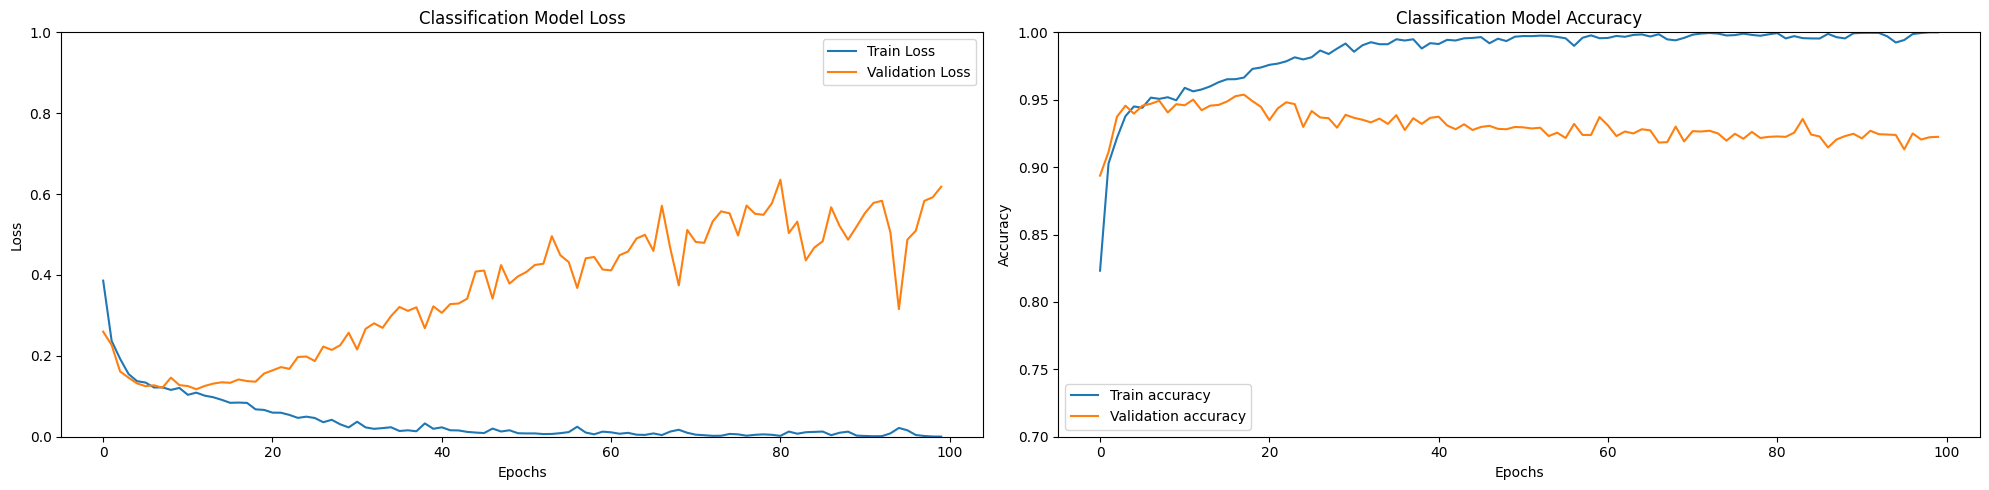

In [59]:
plot_classification_history(classification_history, 'Classification Model')

By the above plots we can conclude that without using early stopping, after near 20 epochs, the model confronts with overfitting. Althogh it is not consideable, but we will test the second model to check what happens after using early stopping.

In fact, in the training process, the train loss decreases and it's accuracy increases, but validation loss grows after epoch 20 and validation accuracy does not change a lot in the remaining epochs, just haing some ups and downs whcih based on scores indicates small overfitting.

Let's evaluate the model on test set and report the below metrics:
- Accuracy
- Precision
- Recall
- F1 Score

In [60]:
y_clf_pred = print_classification_metrics(classification_model, X_clf_test, y_clf_test)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:  0.956             
Precision: 0.977             
Recall:    0.975             
F1 Score:  0.976


In the following, we are going to plot the confusion matrix for true and predicted values.

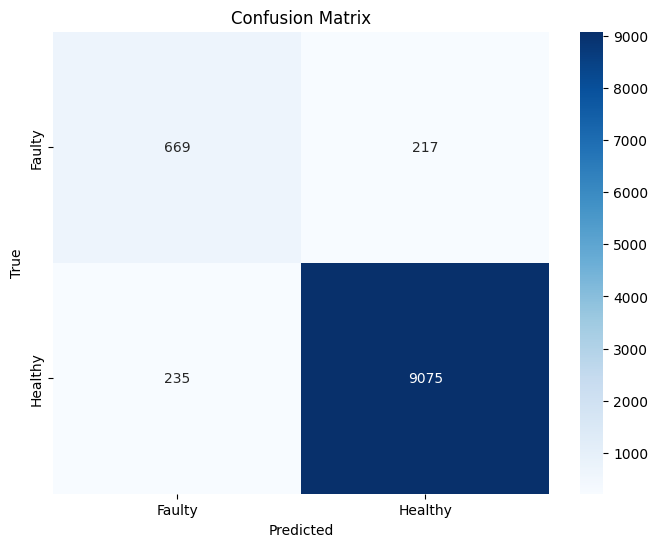

In [61]:
plot_confusion_matrix(y_clf_test, y_clf_pred)

Thus, there are **716** samples which are faulty and they were predicted as faulty, **170** samples were faulty, but predicted as healthy. **237** samples were healthy, but predited as faulty. And finally, there were **9073** samples were healthy and predcited as healthy.

In [62]:
report = classification_report(y_clf_test, y_clf_pred, target_names=['Faulty', 'Healthy'])
print(report)

              precision    recall  f1-score   support

      Faulty       0.74      0.76      0.75       886
     Healthy       0.98      0.97      0.98      9310

    accuracy                           0.96     10196
   macro avg       0.86      0.86      0.86     10196
weighted avg       0.96      0.96      0.96     10196



319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


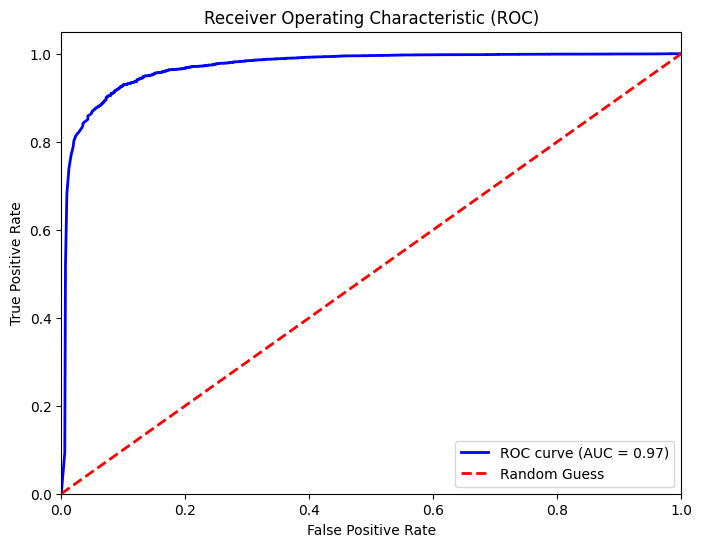

In [63]:
plot_ROC(classification_model, X_clf_test, y_clf_test)

## With early stopping

In [64]:
classification_model = build_cnn_lstm_model("classification", input_shape)

classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
classification_history = classification_model.fit(
    X_train, y_clf_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7377 - loss: 0.5030 - val_accuracy: 0.8884 - val_loss: 0.2608
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8951 - loss: 0.2475 - val_accuracy: 0.9061 - val_loss: 0.2262
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9210 - loss: 0.1958 - val_accuracy: 0.9377 - val_loss: 0.1606
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9379 - loss: 0.1555 - val_accuracy: 0.9459 - val_loss: 0.1332
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9416 - loss: 0.1435 - val_accuracy: 0.9428 - val_loss: 0.1310
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9449 - loss: 0.1338 - val_accuracy: 0.9411 - val_loss: 0.1313
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9498 - loss: 0.1198 - val_accuracy: 0.9332 - val_loss: 0.1707
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9472 - loss: 0.1326 - val_accuracy: 0.9284 - val_loss: 0.

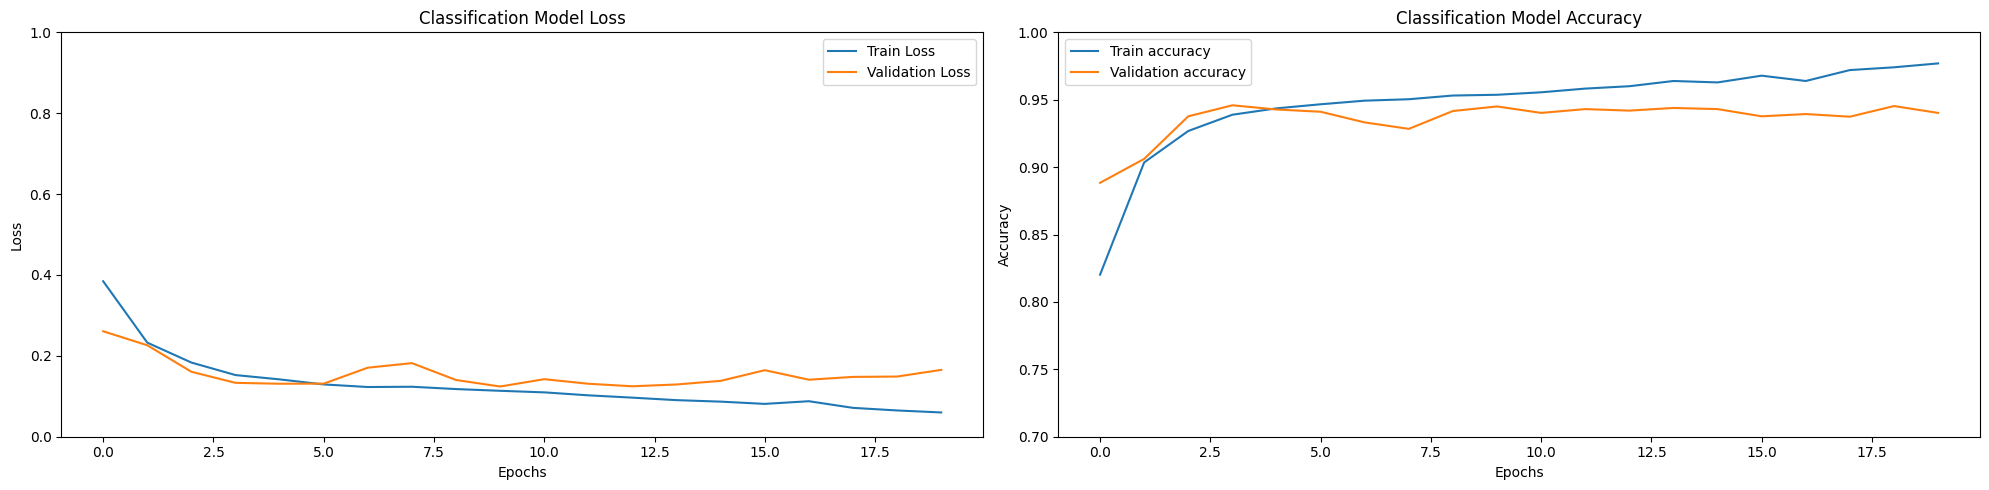

In [65]:
plot_classification_history(classification_history, 'Classification Model')

In [66]:
y_clf_pred = print_classification_metrics(classification_model, X_clf_test, y_clf_test)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:  0.961             
Precision: 0.978             
Recall:    0.979             
F1 Score:  0.979


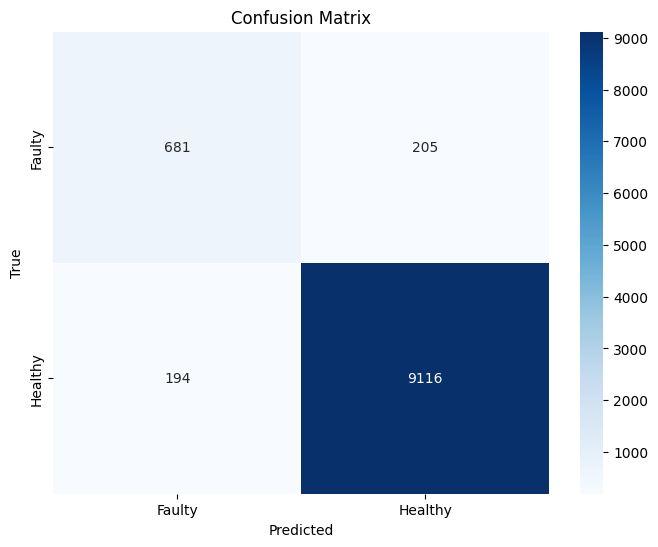

In [67]:
plot_confusion_matrix(y_clf_test, y_clf_pred)

In [68]:
report = classification_report(y_clf_test, y_clf_pred, target_names=['Faulty', 'Healthy'])
print(report)

              precision    recall  f1-score   support

      Faulty       0.78      0.77      0.77       886
     Healthy       0.98      0.98      0.98      9310

    accuracy                           0.96     10196
   macro avg       0.88      0.87      0.88     10196
weighted avg       0.96      0.96      0.96     10196



319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


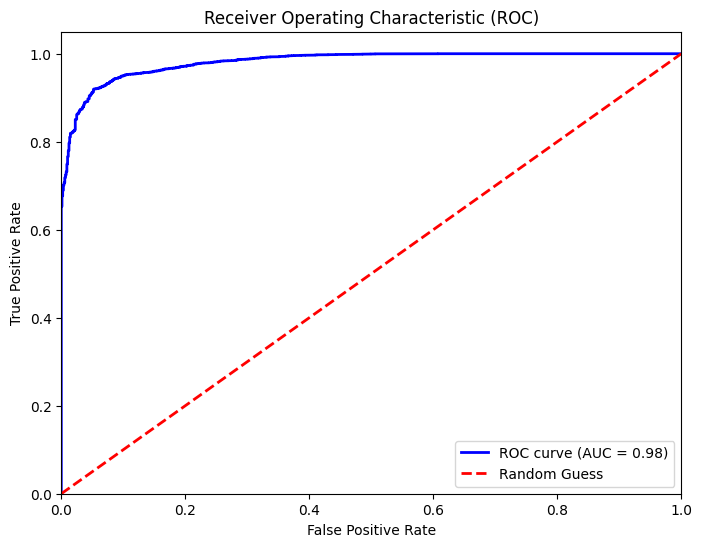

In [69]:
plot_ROC(classification_model, X_clf_test, y_clf_test)

# CNN-LSTM Regression

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def print_regression_metrics(model, X, y_true):

    y_reg_pred = model.predict(X)
    
    mape = np.mean(np.abs((y_true - y_reg_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_reg_pred)
    mse = mean_squared_error(y_true, y_reg_pred)
    rmse = np.sqrt(mse)

    print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}\
            \nMean Absolute Error (MAE):             {mae:.3f} \
            \nMean Squared Error (MSE):              {mse:.3f} \
            \nRoot Mean Squared Error (RMSE):        {rmse:.3f}')
    return y_reg_pred

In [35]:
import plotly.graph_objects as go

def plot_RUL_predictions(sorted_y_reg_test, sorted_y_reg_pred):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=np.arange(1, len(RUL)+1),
        y=sorted_y_reg_test,
        mode='markers',
        name='Actual RUL',
        marker=dict(color='blue', opacity=0.5)
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(1, len(RUL)+1),
        y=sorted_y_reg_pred,
        mode='markers',
        name='Predicted RUL',
        line=dict(color='red')
    ))

    for i in range(len(RUL)):
        fig.add_shape(
            type="line",
            x0=i+1,
            y0=sorted_y_reg_pred[i],
            x1=i+1,
            y1=sorted_y_reg_test[i],
            line=dict(color="black", width=1)
        )

    # Update layout
    fig.update_layout(
        title='True vs Predicted RUL',
        xaxis_title='Engine Number',
        yaxis_title='RUL',
        legend=dict(x=0.01, y=0.99)
    )

    fig.show()

## Without early stopping

In [256]:
regression_model = build_cnn_lstm_model("regression", input_shape)
regression_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

regression_model.summary()


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_96 (Conv1D)              │ (None, 30, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_97 (Conv1D)              │ (None, 30, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_48 (MaxPooling1D) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_60 (LSTM)                  │ (None, 10, 50)         │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression (Dense)              │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,051 (203.32 KB)

 Trainable params: 52,051 (203.32 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
regression_history = regression_model.fit(
    X_train, y_reg_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9395.4482 - mae: 78.5685 - val_loss: 11368.8057 - val_mae: 82.8005
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7167.1460 - mae: 66.5780 - val_loss: 9899.5479 - val_mae: 76.3393
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6208.8633 - mae: 61.4320 - val_loss: 8959.7725 - val_mae: 72.2912
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5538.5591 - mae: 57.8855 - val_loss: 8279.8750 - val_mae: 69.4216
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5012.6060 - mae: 55.0856 - val_loss: 7762.8789 - val_mae: 67.2837
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4689.5840 - mae: 53.5269 - val_loss: 7354.2354 - val_mae: 65.6294
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4389.7266 - mae: 51.8943 - val_loss: 7026.3945 - val_mae: 64.3324
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4241.1748 - mae: 51.3017 - val_loss: 6758.2456 - val_mae: 63.296

In [76]:
y_reg_pred = print_regression_metrics(regression_model, X_reg_test, y_reg_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Percentage Error (MAPE): 156.718            
Mean Absolute Error (MAE):             13.280             
Mean Squared Error (MSE):              374.018             
Root Mean Squared Error (RMSE):        19.340


In [77]:
zipped_lists = zip(y_reg_test, y_reg_pred)
sorted_zipped_lists = sorted(zipped_lists)

sorted_y_reg_test, sorted_y_reg_pred = zip(*sorted_zipped_lists)

sorted_y_reg_test = list(sorted_y_reg_test)
sorted_y_reg_pred = np.array(list(sorted_y_reg_pred))

sorted_y_reg_pred = sorted_y_reg_pred.reshape(-1)

In [78]:
plot_RUL_predictions(sorted_y_reg_test, sorted_y_reg_pred)

## With early stopping

In [113]:
regression_model = build_cnn_lstm_model("regression", input_shape)
regression_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [114]:
regression_history = regression_model.fit(
    X_train, y_reg_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 11020.5244 - mae: 87.2081 - val_loss: 14314.4131 - val_mae: 96.1591
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9783.1592 - mae: 80.0198 - val_loss: 13574.3906 - val_mae: 92.7609
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8984.2529 - mae: 76.3793 - val_loss: 12916.6904 - val_mae: 89.7621
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8598.2041 - mae: 74.0237 - val_loss: 12318.1289 - val_mae: 87.0523
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8057.5190 - mae: 71.6872 - val_loss: 11763.1699 - val_mae: 84.5591
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7749.4180 - mae: 69.3880 - val_loss: 11248.8428 - val_mae: 82.2676
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7389.5166 - mae: 67.6142 - val_loss: 10770.1504 - val_mae: 80.1513
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7060.8921 - mae: 66.0543 - val_loss: 10325.2383 - val_mae

In [115]:
y_reg_pred = print_regression_metrics(regression_model, X_reg_test, y_reg_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Mean Absolute Percentage Error (MAPE): 155.545            
Mean Absolute Error (MAE):             36.029             
Mean Squared Error (MSE):              1954.732             
Root Mean Squared Error (RMSE):        44.212


In [90]:
zipped_lists = zip(y_reg_test, y_reg_pred)
sorted_zipped_lists = sorted(zipped_lists)

sorted_y_reg_test, sorted_y_reg_pred = zip(*sorted_zipped_lists)

sorted_y_reg_test = list(sorted_y_reg_test)
sorted_y_reg_pred = np.array(list(sorted_y_reg_pred))

sorted_y_reg_pred = sorted_y_reg_pred.reshape(-1)

plot_RUL_predictions(sorted_y_reg_test, sorted_y_reg_pred)

## Consider all windows - CNN-LSTM

### without early stopping

In [253]:
regression_model = build_cnn_lstm_model("regression", input_shape)
regression_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [254]:
regression_history = regression_model.fit(
    X_train, y_reg_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 10954.9463 - mae: 86.4738 - val_loss: 13846.2275 - val_mae: 94.0060
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9333.0146 - mae: 77.9186 - val_loss: 13110.3340 - val_mae: 90.6425
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8831.8115 - mae: 75.1614 - val_loss: 12467.7217 - val_mae: 87.7271
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8197.5967 - mae: 72.1314 - val_loss: 11883.0400 - val_mae: 85.0965
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7886.2417 - mae: 69.9491 - val_loss: 11341.0840 - val_mae: 82.6768
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7394.6235 - mae: 67.4746 - val_loss: 10838.6201 - val_mae: 80.4522
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7050.9087 - mae: 65.5651 - val_loss: 10372.3564 - val_mae: 78.4029
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6558.3677 - mae: 62.9183 - val_loss: 9940.9014 - val_mae:

In [255]:
y_reg_pred = print_regression_metrics(regression_model, X_reg_test_all, y_reg_test_all)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Percentage Error (MAPE): 67.552            
Mean Absolute Error (MAE):             29.608             
Mean Squared Error (MSE):              1618.245             
Root Mean Squared Error (RMSE):        40.227


### with early stopping

In [250]:
regression_model = build_cnn_lstm_model("regression", input_shape)
regression_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [251]:
regression_history = regression_model.fit(
    X_train, y_reg_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 11015.0215 - mae: 86.7490 - val_loss: 13991.0498 - val_mae: 94.6714
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9513.5635 - mae: 79.1008 - val_loss: 13241.5234 - val_mae: 91.2407
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8866.5176 - mae: 75.2578 - val_loss: 12590.0137 - val_mae: 88.2805
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8212.2900 - mae: 72.2634 - val_loss: 11996.2480 - val_mae: 85.6041
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7915.9019 - mae: 70.2159 - val_loss: 11447.2197 - val_mae: 83.1487
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7396.7734 - mae: 67.7899 - val_loss: 10938.9170 - val_mae: 80.8958
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6964.1738 - mae: 65.5448 - val_loss: 10467.7578 - val_mae: 78.8215
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6682.3325 - mae: 63.8536 - val_loss: 10030.3770 - val_mae

In [252]:
y_reg_pred = print_regression_metrics(regression_model, X_reg_test_all, y_reg_test_all)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Absolute Percentage Error (MAPE): 60.141            
Mean Absolute Error (MAE):             27.659             
Mean Squared Error (MSE):              1596.937             
Root Mean Squared Error (RMSE):        39.962


# CNN model

### Classification

In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input

def build_cnn_model(mode, input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', padding='same'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Flatten())
    
    if mode == "classification":
        model.add(Dense(1, activation='sigmoid', name='classification'))
    else:
        model.add(Dense(1, activation='linear', name='regression'))
    
    return model

In [260]:
cnn_model_clf = build_cnn_model("classification", input_shape)
cnn_model_clf.summary()

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_98 (Conv1D)              │ (None, 30, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_99 (Conv1D)              │ (None, 30, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_49 (MaxPooling1D) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 1)              │           641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,441 (36.88 KB)

 Trainable params: 9,441 (36.88 KB)

 Non-trainable params: 0 (0.00 B)

In [202]:
cnn_model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_clf_history = cnn_model_clf.fit(
    X_train, y_clf_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7771 - loss: 0.4507 - val_accuracy: 0.9019 - val_loss: 0.2281
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.2157 - val_accuracy: 0.9197 - val_loss: 0.1949
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9306 - loss: 0.1691 - val_accuracy: 0.9487 - val_loss: 0.1456
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9497 - loss: 0.1195 - val_accuracy: 0.9571 - val_loss: 0.1122
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - loss: 0.1114 - val_accuracy: 0.9504 - val_loss: 0.1229
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9524 - loss: 0.1074 - val_accuracy: 0.9591 - val_loss: 0.1047
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9543 - loss: 0.1027 - val_accuracy: 0.9569 - val_loss: 0.1068
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9528 - loss: 0.1023 - val_accuracy: 0.9594 - 

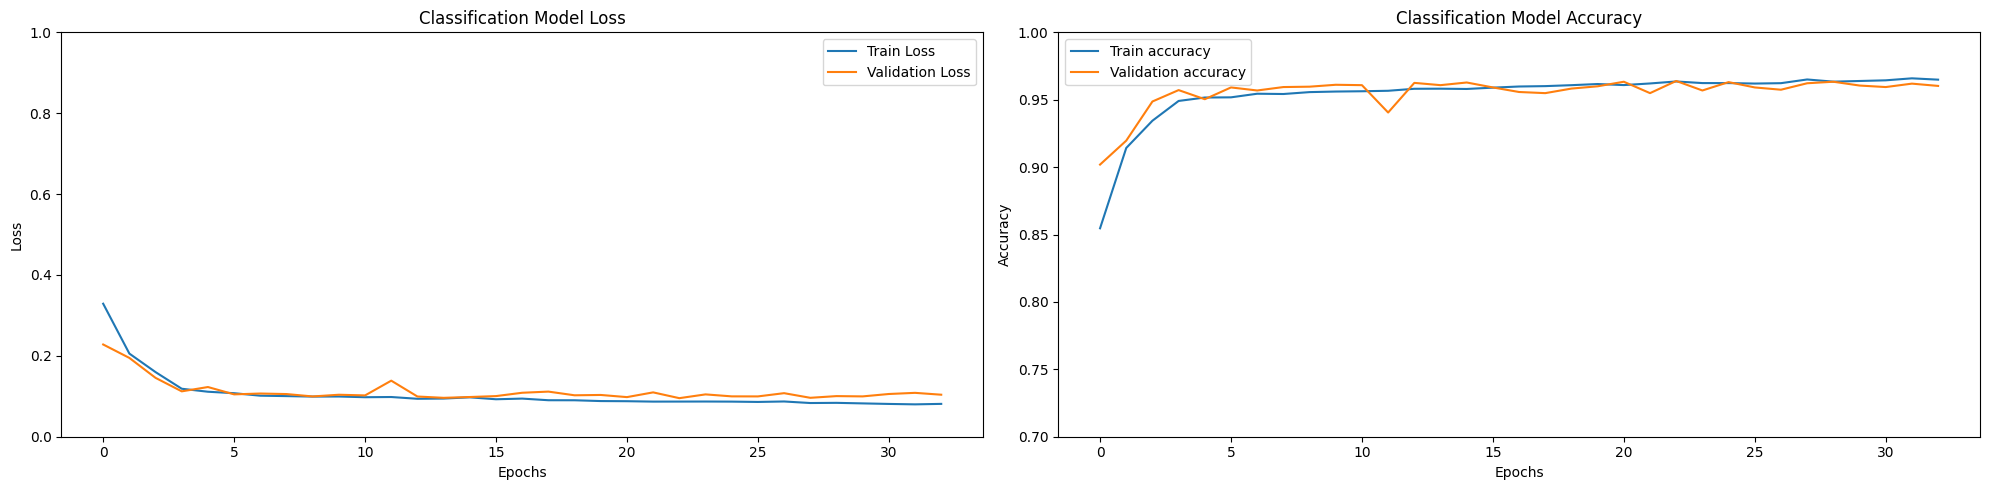

In [203]:
plot_classification_history(cnn_clf_history, 'Classification Model')

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:  0.971             
Precision: 0.980             
Recall:    0.989             
F1 Score:  0.984


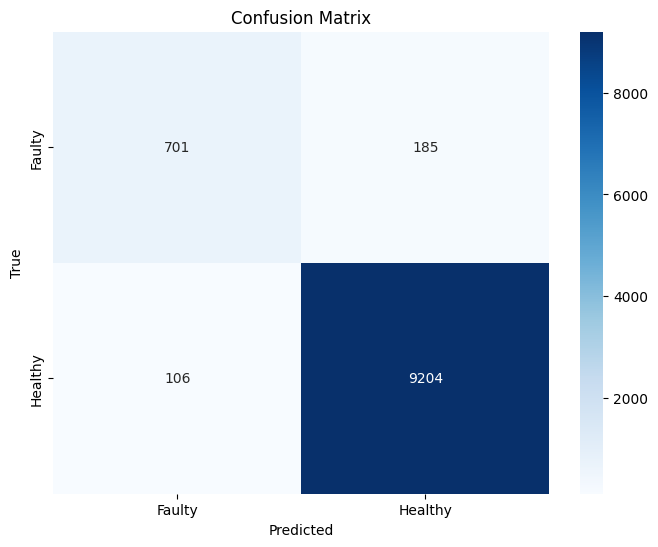

              precision    recall  f1-score   support

      Faulty       0.87      0.79      0.83       886
     Healthy       0.98      0.99      0.98      9310

    accuracy                           0.97     10196
   macro avg       0.92      0.89      0.91     10196
weighted avg       0.97      0.97      0.97     10196

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


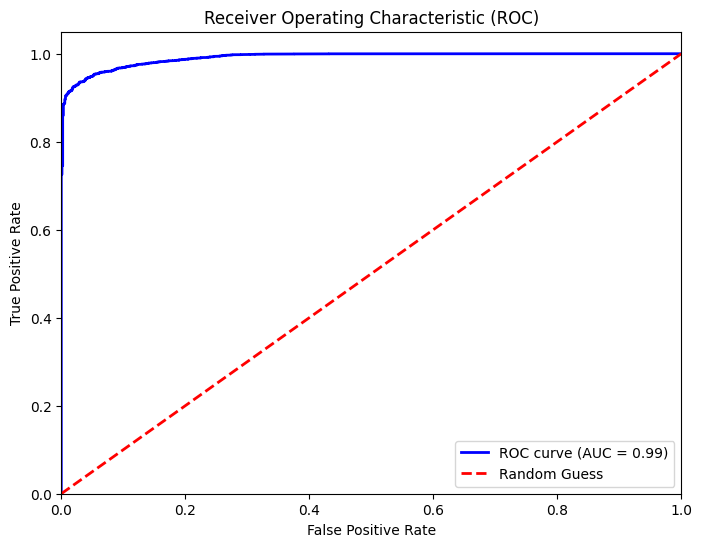

In [204]:
y_clf_pred_cnn = print_classification_metrics(cnn_model_clf, X_clf_test, y_clf_test)
plot_confusion_matrix(y_clf_test, y_clf_pred_cnn)
report = classification_report(y_clf_test, y_clf_pred_cnn, target_names=['Faulty', 'Healthy'])
print(report)
plot_ROC(cnn_model_clf, X_clf_test, y_clf_test)

### Regression

In [217]:

cnn_model_reg = build_cnn_model("regression", input_shape)
cnn_model_reg.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_76 (Conv1D)              │ (None, 30, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_77 (Conv1D)              │ (None, 30, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_38 (MaxPooling1D) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression (Dense)              │ (None, 1)              │           641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,441 (36.88 KB)

 Trainable params: 9,441 (36.88 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
cnn_model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

cnn_reg_history = lstm_model_reg.fit(
    X_train, y_reg_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 791.0300 - mae: 18.7798 - val_loss: 1671.6199 - val_mae: 26.0763
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 780.7958 - mae: 18.4645 - val_loss: 1675.6747 - val_mae: 25.6455
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 736.3229 - mae: 18.1236 - val_loss: 1641.6478 - val_mae: 25.3367
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 755.4556 - mae: 18.2228 - val_loss: 1550.0355 - val_mae: 25.9941
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 724.3178 - mae: 18.0542 - val_loss: 1638.0620 - val_mae: 25.5684
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 728.3886 - mae: 18.0180 - val_loss: 1717.4077 - val_mae: 26.8643
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 702.6887 - mae: 17.6213 - val_loss: 1747.1266 - val_mae: 26.7191
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 711.2391 - mae: 17.8551 - val_loss: 1692.9589 - val_mae: 26.2206
Epoch 9

In [214]:
y_reg_pred_cnn = print_regression_metrics(cnn_model_reg, X_reg_test, y_reg_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Mean Absolute Percentage Error (MAPE): 100.078            
Mean Absolute Error (MAE):             75.550             
Mean Squared Error (MSE):              7434.595             
Root Mean Squared Error (RMSE):        86.224


# LSTM model

In [261]:
def build_lstm_model(mode, input_shape):
    model = Sequential()
    model.add(Input(input_shape))
    model.add(LSTM(50, activation='tanh', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='tanh', return_sequences=False))
    model.add(Dropout(0.2))
    
    if mode == "classification":
        model.add(Dense(1, activation='sigmoid', name='classification'))
    else:
        model.add(Dense(1, activation='linear', name='regression'))
    
    return model

## classification

In [262]:
lstm_model_clf = build_lstm_model("classification", input_shape)
lstm_model_clf.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                  │ (None, 30, 50)         │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_63 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,651 (131.45 KB)

 Trainable params: 33,651 (131.45 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
lstm_model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
lstm_clf_history = lstm_model_clf.fit(
    X_train, y_clf_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7701 - loss: 0.4653 - val_accuracy: 0.9092 - val_loss: 0.2214
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9232 - loss: 0.1980 - val_accuracy: 0.9343 - val_loss: 0.1537
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9424 - loss: 0.1505 - val_accuracy: 0.9428 - val_loss: 0.1351
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9445 - loss: 0.1354 - val_accuracy: 0.9352 - val_loss: 0.1476
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9472 - loss: 0.1241 - val_accuracy: 0.9493 - val_loss: 0.1295
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9470 - loss: 0.1259 - val_accuracy: 0.9408 - val_loss: 0.1298
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9478 - loss: 0.1205 - val_accuracy: 0.9431 - val_loss: 0.1264
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9493 - loss: 0.1132 - val_accuracy: 0.9509 - 

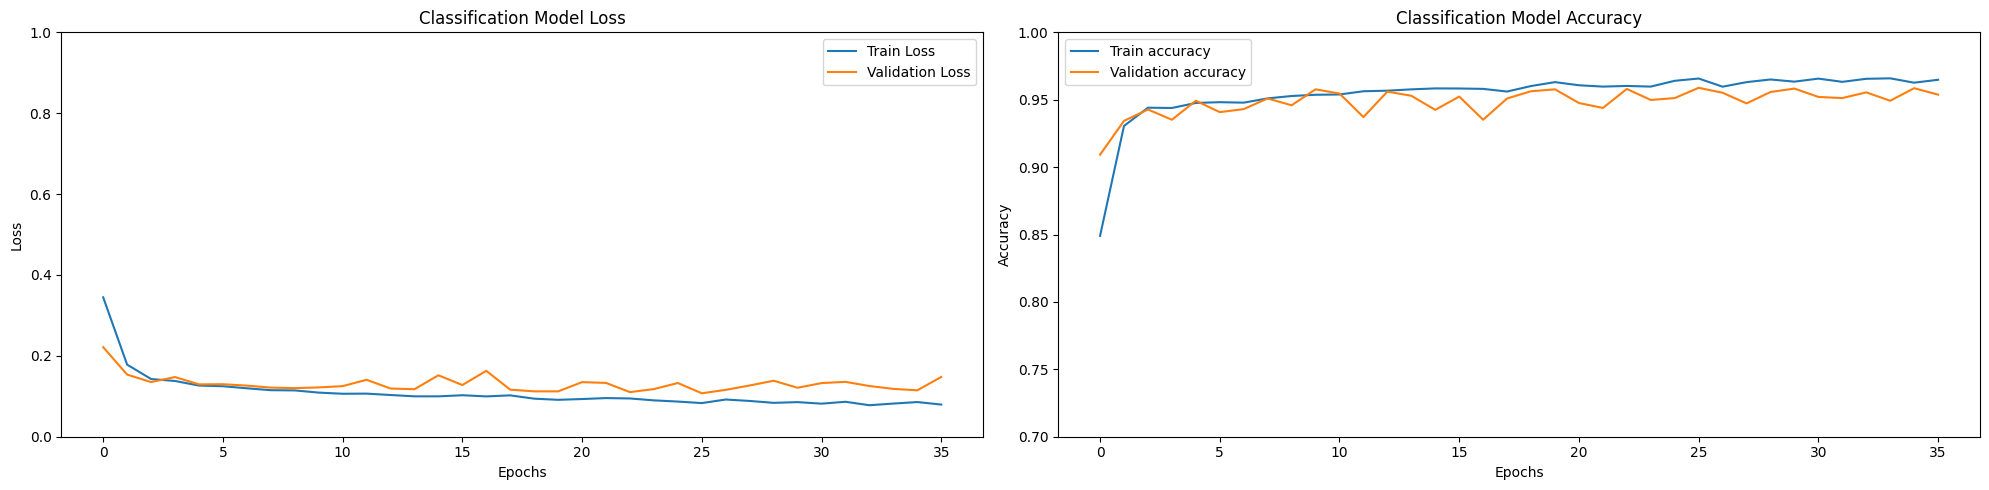

In [176]:
plot_classification_history(lstm_clf_history, 'Classification Model')

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:  0.969             
Precision: 0.978             
Recall:    0.988             
F1 Score:  0.983


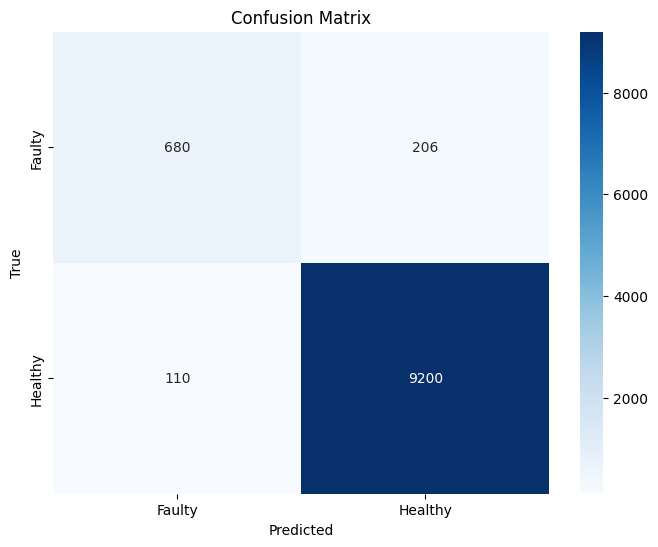

              precision    recall  f1-score   support

      Faulty       0.86      0.77      0.81       886
     Healthy       0.98      0.99      0.98      9310

    accuracy                           0.97     10196
   macro avg       0.92      0.88      0.90     10196
weighted avg       0.97      0.97      0.97     10196

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


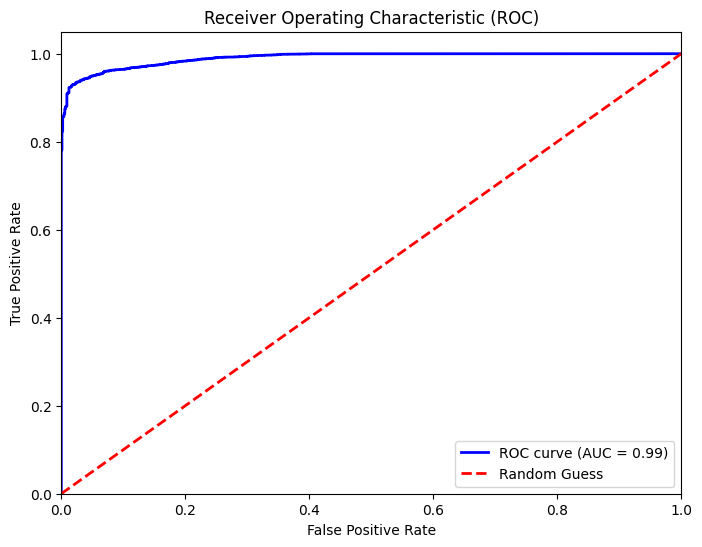

In [180]:
y_clf_pred_lstm = print_classification_metrics(lstm_model_clf, X_clf_test, y_clf_test)
plot_confusion_matrix(y_clf_test, y_clf_pred_lstm)
report = classification_report(y_clf_test, y_clf_pred_lstm, target_names=['Faulty', 'Healthy'])
print(report)
plot_ROC(lstm_model_clf, X_clf_test, y_clf_test)

## Regression

In [184]:
lstm_model_reg = build_lstm_model("regression", input_shape)
lstm_model_reg.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 17731, 50)      │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 17731, 50)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression (Dense)              │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,651 (131.45 KB)

 Trainable params: 33,651 (131.45 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
lstm_model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Train the classification model
lstm_reg_history = lstm_model_reg.fit(
    X_train, y_reg_train,
    epochs=100,
    batch_size=200,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 11090.4141 - mae: 87.3926 - val_loss: 14168.3584 - val_mae: 95.4867
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9703.5830 - mae: 79.9987 - val_loss: 13408.2559 - val_mae: 92.0015
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9019.1875 - mae: 76.5554 - val_loss: 12722.2500 - val_mae: 88.8799
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8450.6846 - mae: 73.0743 - val_loss: 12109.6055 - val_mae: 86.1126
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7900.9448 - mae: 70.3306 - val_loss: 11548.7773 - val_mae: 83.6020
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7628.8135 - mae: 68.5712 - val_loss: 11030.7812 - val_mae: 81.3013
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7032.0269 - mae: 65.7314 - val_loss: 10552.8262 - val_mae: 79.1938
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6659.7031 - mae: 63.8598 - val_loss: 10107.5537 - val_mae

In [186]:
y_reg_pred_lstm = print_regression_metrics(lstm_model_reg, X_reg_test, y_reg_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Mean Absolute Percentage Error (MAPE): 155.077            
Mean Absolute Error (MAE):             12.233             
Mean Squared Error (MSE):              287.516             
Root Mean Squared Error (RMSE):        16.956


In [187]:
zipped_lists = zip(y_reg_test, y_reg_pred_lstm)
sorted_zipped_lists = sorted(zipped_lists)

sorted_y_reg_test, sorted_y_reg_pred = zip(*sorted_zipped_lists)

sorted_y_reg_test = list(sorted_y_reg_test)
sorted_y_reg_pred = np.array(list(sorted_y_reg_pred))

sorted_y_reg_pred = sorted_y_reg_pred.reshape(-1)
plot_RUL_predictions(sorted_y_reg_test, sorted_y_reg_pred)